## Authors: 
**Keita, Alain**

**Shuaib, Abdullah**

# CMSC 320: Data Science Final Tutorial

# Introduction:

Before Thanksgiving week, a new variant of SARS-CoV-2 (B.1.1.529 or Omnicron) was reported to the World Health Organization. It was first found in Botswana and South Africa, and had made its way to the United States the week we came back from Thanksgiving break. Unlike the Delta variant, there is very little known about the severity of the Omnicron variant. There has been no information on how fast it can spread, the severity of the symptoms, or how effective vaccines are against it. 

More information about this can be found here: https://www.cdc.gov/coronavirus/2019-ncov/variants/omicron-variant.html

It seemed like the world was headed back to normal up until December. We saw the announcement of this new variant as an opportunity to identify which factors contribute to how well the top countries in the world have handled Covid-19 sp far. Our goal is to not only find some good predictors, but also display the data science principles we've learned throughout the semester so that a casual reader could follow along.

# Data Collection and Processing:

retrieve hospital rank and covid death data, for our sample we choose the top countries based on hospital rankings (explained later)

establish credibility of statista and newsweek, explain methodology and how it pertains to credibility

**what do we need to import for this step???**

**explain how we are retrieving the data using pandas.read_html**

**explain that we had forbidden access to newsweek so we found a workaroud**

In [1]:
import pandas as pd
import lxml

# as of 12/16/2021
covid_url = "https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/"

results = pd.read_html(covid_url)

**because there are two tables found in our response, we'll only use the table we need**

In [2]:
covid_df = results[0]
covid_df

,Characteristic,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days)
0,Peru,2254373,10958,201770,391,37,32.51,6206.31,12.03
1,Bulgaria,714688,9102,29536,476,50,6.98,4234.09,68.24
2,Bosnia and Herzegovina,280980,2469,12918,138,0,3.30,3913.36,41.81
3,Hungary,1182922,25354,36429,818,0,9.77,3728.68,83.73
4,North Macedonia,219408,2008,7732,74,9,2.08,3711.14,35.52
...,...,...,...,...,...,...,...,...,...
150,Niger,7154,63,268,4,1,23.31,11.50,0.17
151,Chad,5703,0,181,0,0,15.95,11.35,0.00
152,New Zealand,12986,558,47,3,1,4.92,9.56,0.61
153,China,112345,505,4849,0,0,1397.72,3.47,0.00


**for the sake of doing things in the same order, let's retrieve our second table of world hospital rankings**

In [3]:
hospital_url = "https://www.davidscottco.com/worlds-best-hospitals-of-2021-top-200-global-ranking/"
results = pd.read_html (hospital_url)
results

[        Rank                                     Hospital        Country  \
         Rank                                     Hospital        Country   
 0          1                      Mayo Clinic – Rochester  United States   
 1          2                             Cleveland Clinic  United States   
 2          3               Massachusetts General Hospital  United States   
 3          4  Toronto General – University Health Network         Canada   
 4          5                   The Johns Hopkins Hospital  United States   
 ..       ...                                          ...            ...   
 195  101-200                                      UZ Gent        Belgium   
 196  101-200         Vanderbilt University Medical Center  United States   
 197  101-200             VCH – Vancouver General Hospital         Canada   
 198  101-200                      Yale New Haven Hospital  United States   
 199  101-200        Yokohama Municipal Citizen’s Hospital          Japan   

**here we only got one table back from the website, as it should be**

**now we sanitize the data**

In [4]:
#remove duplicate columns names
rank_df = results[0]
rank_df.columns = ['Rank','Hospital','Country','City','US_State', 'Footnotes']
rank_df

,Rank,Hospital,Country,City,US_State,Footnotes
0,1,Mayo Clinic – Rochester,United States,Rochester,MN,NaN
1,2,Cleveland Clinic,United States,Cleveland,OH,NaN
2,3,Massachusetts General Hospital,United States,Boston,MA,NaN
3,4,Toronto General – University Health Network,Canada,Toronto,NaN,3.0
4,5,The Johns Hopkins Hospital,United States,Baltimore,MD,NaN
...,...,...,...,...,...,...
195,101-200,UZ Gent,Belgium,Gent,NaN,NaN
196,101-200,Vanderbilt University Medical Center,United States,Nashville,TN,NaN
197,101-200,VCH – Vancouver General Hospital,Canada,Vancouver,NaN,NaN
198,101-200,Yale New Haven Hospital,United States,New Haven,CT,NaN


**we drop the footnotes column, make sure to set inplace=True otherwise it's not reallly deleted**

In [5]:
rank_df.drop (columns = ['Footnotes'], inplace= True)

**find which columns have NaN values and replace them with appropriate value given context**

In [6]:
rank_df.columns[rank_df.isna().any()].tolist()

['US_State']

In [7]:
rank_df.US_State.fillna('', inplace=True)
rank_df

,Rank,Hospital,Country,City,US_State
0,1,Mayo Clinic – Rochester,United States,Rochester,MN
1,2,Cleveland Clinic,United States,Cleveland,OH
2,3,Massachusetts General Hospital,United States,Boston,MA
3,4,Toronto General – University Health Network,Canada,Toronto,
4,5,The Johns Hopkins Hospital,United States,Baltimore,MD
...,...,...,...,...,...
195,101-200,UZ Gent,Belgium,Gent,
196,101-200,Vanderbilt University Medical Center,United States,Nashville,TN
197,101-200,VCH – Vancouver General Hospital,Canada,Vancouver,
198,101-200,Yale New Haven Hospital,United States,New Haven,CT


**change column and countries to be identical**

In [8]:
covid_df.rename (columns = {'Characteristic': 'Country'}, inplace = True)

a = set (covid_df.Country.unique()) # the set containing all countries in the covid dataframe
b = set (rank_df.Country.unique()) # the set containing all countries in the hospital rank dataframe

#elements present in rank_df but not in covid_df
# print (a-b)

In [9]:
# print (covid_df.Country.unique())

# we need to change the spelling of the countries in covid_df to match the elements in rename_lst
# for all the countries in rename_lst, all but United States have the subscript 1
covid_df.replace ('Denmark¹', 'Denmark', inplace = True)
covid_df.replace ('France¹', 'France', inplace = True)
covid_df.replace ('Netherlands¹', 'The Netherlands', inplace = True)
covid_df.replace ('United Kingdom¹', 'United Kingdom', inplace = True)
covid_df.replace ('USA¹', 'United States', inplace = True)

#elements present in rank_df but not in covid_df -->returns empty set
set (rank_df.Country.unique()) - set (covid_df.Country.unique())

set()

**now we need to filter out all the countries outside of the top 25 so we can join the two dataframes**

**to do this, we can iterate over our covid dataframe and drop the rows where country is not in listed in the rank dataframe**

**why is it bad practice to modify a datafram WHILE iterating through it???**

In [10]:
rows_to_drop = []
for idx,data in covid_df.iterrows():
    if data.Country not in rank_df.Country.unique():
        rows_to_drop.append(idx)
        
        
covid_df.drop (rows_to_drop, inplace = True)

# reset the indices
covid_df = covid_df.reset_index(drop = True)
print (type(covid_df['Country']))
covid_df

<class 'pandas.core.series.Series'>


,Country,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days)
0,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38
1,United States,49703016,637381,793713,7436,167,328.24,2418.09,22.65
2,Belgium,1929772,60866,27504,185,0,11.48,2394.97,16.11
3,Poland,3828248,143577,88479,2779,65,37.97,2330.18,73.19
4,Mexico,3917361,15346,296620,1307,235,127.58,2325.05,10.24
5,Italy,5225517,106941,134831,544,66,60.30,2236.10,9.02
6,United Kingdom,10757841,302425,145982,791,52,66.83,2184.23,11.84
7,Spain,5290190,87232,88381,222,0,47.08,1877.38,4.72
8,France,7827502,325955,114516,661,48,67.06,1707.67,9.86
9,Austria,1228034,24931,13162,318,19,8.88,1482.70,35.82


**Now we want to merge our two datasets**

**explain why and how you're merging**

In [11]:
final_df = covid_df.merge(rank_df, on = 'Country', how= 'left')
final_df

,Country,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days),Rank,Hospital,City,US_State
0,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,36,Hospital Israelita Albert Einstein,Sao Paulo,
1,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,78,Hospital Moinhos de Vento,Porto Alegre,
2,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,101-200,Hospital Oswaldo Cruz,Sao Paulo,
3,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,101-200,Hospital Sirio Libanes,Sao Paulo,
4,United States,49703016,637381,793713,7436,167,328.24,2418.09,22.65,1,Mayo Clinic – Rochester,Rochester,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,Chung-Ang University Hospital,Seoul,
196,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,Gangnam Severance Hospital – Yonsei University,Seoul,
197,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,Kangbuk Samsung Hospital,Seoul,
198,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,KyungHee University Medical Center,Seoul,


**at this point after merging data frames, I realized that it's still not as clean as I would like it to be**

**after some thinking, I decided we should compress our final_df to contain the number of ranked hospitals in each top 200 country**

In [12]:
rank_count = []

for idx,row in covid_df.iterrows():
    
    sub_df = rank_df [ rank_df['Country'] == row['Country']]
    rank_count.append ((len (sub_df)))
    
covid_df ['Ranked Hospitals'] = rank_count
covid_df

,Country,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days),Ranked Hospitals
0,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,4
1,United States,49703016,637381,793713,7436,167,328.24,2418.09,22.65,43
2,Belgium,1929772,60866,27504,185,0,11.48,2394.97,16.11,3
3,Poland,3828248,143577,88479,2779,65,37.97,2330.18,73.19,1
4,Mexico,3917361,15346,296620,1307,235,127.58,2325.05,10.24,2
5,Italy,5225517,106941,134831,544,66,60.30,2236.10,9.02,11
6,United Kingdom,10757841,302425,145982,791,52,66.83,2184.23,11.84,7
7,Spain,5290190,87232,88381,222,0,47.08,1877.38,4.72,11
8,France,7827502,325955,114516,661,48,67.06,1707.67,9.86,13
9,Austria,1228034,24931,13162,318,19,8.88,1482.70,35.82,6


# Exploratory analysis and visualization

**since the data set is small (25 countries), let's use a bar graph to see which countries have the most ranked ranked hospitals**

**we will need to import a python library for graphs (provide documentation)**

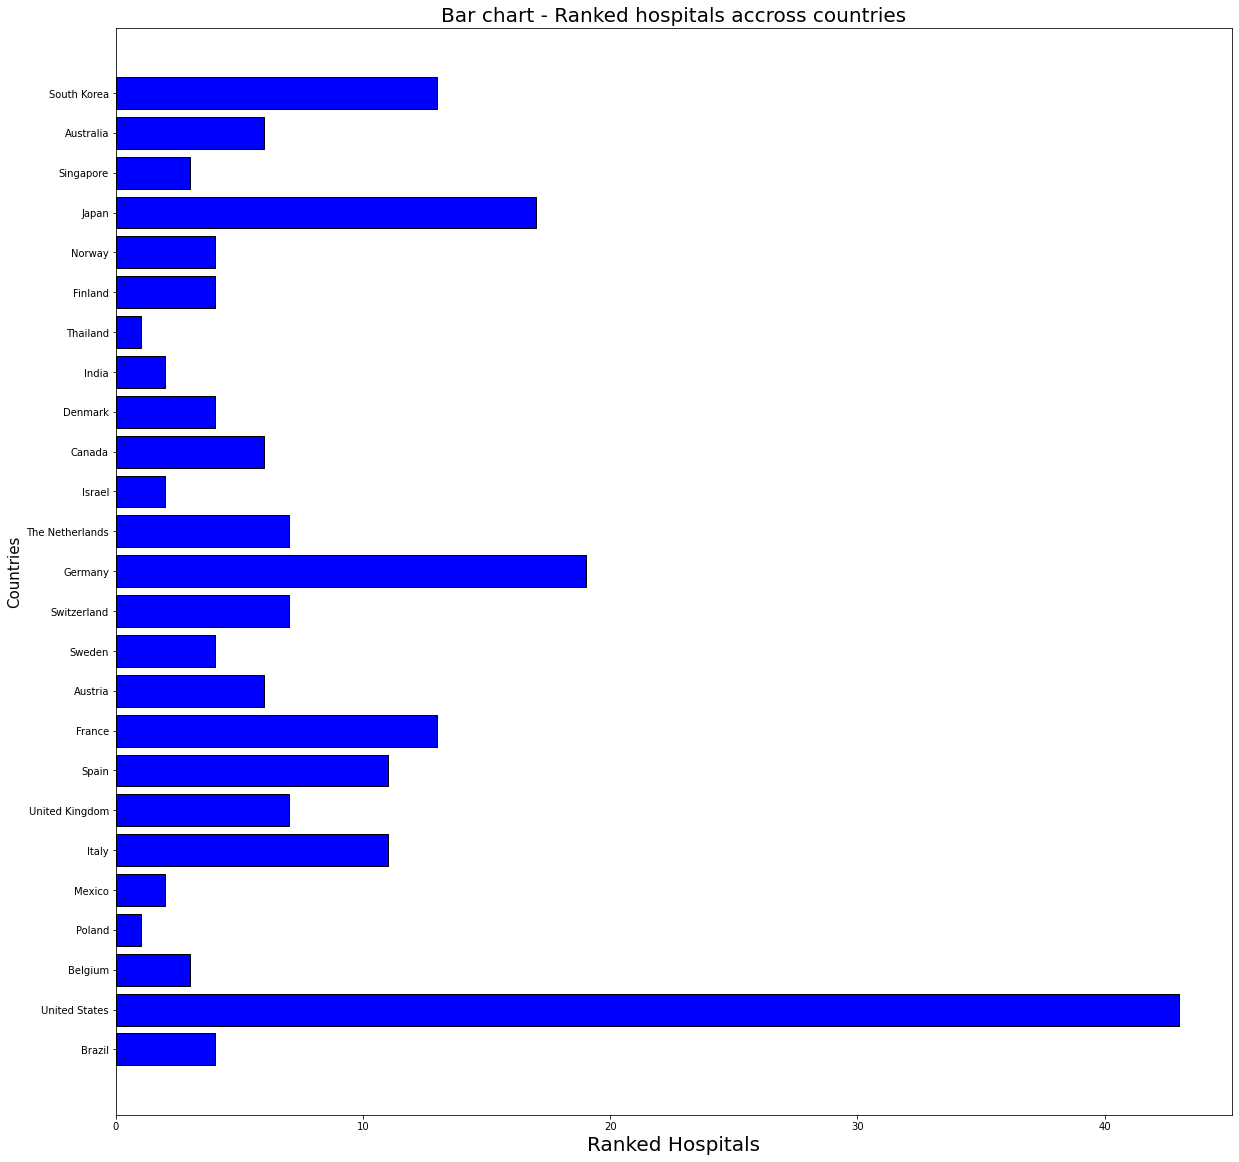

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

# we want our y-axis to be the different countries 
# our x-axis should be the number of ranked hospitals
# x and y should be of the same length


countries = covid_df['Country']
x = np.arange (len(countries)) #what does this line do

y = covid_df['Ranked Hospitals']


plt.barh (x, y, color = 'blue', edgecolor = 'black')
# set even space between y values
plt.yticks (x, countries)

plt.rcParams["figure.figsize"] = (20,30)
plt.xlabel('Ranked Hospitals', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.title("Bar chart - Ranked hospitals accross countries", fontsize = 20)

plt.show()

**we see that the US has way more ranked hospitals than any other country, but I would guess that it does not translate to less covid cases??**

**let's plot those values separately in a bar graph to see potential correlation?**

Text(0.5, 1.0, 'Bar chart - Covid cases in the last 7 days')

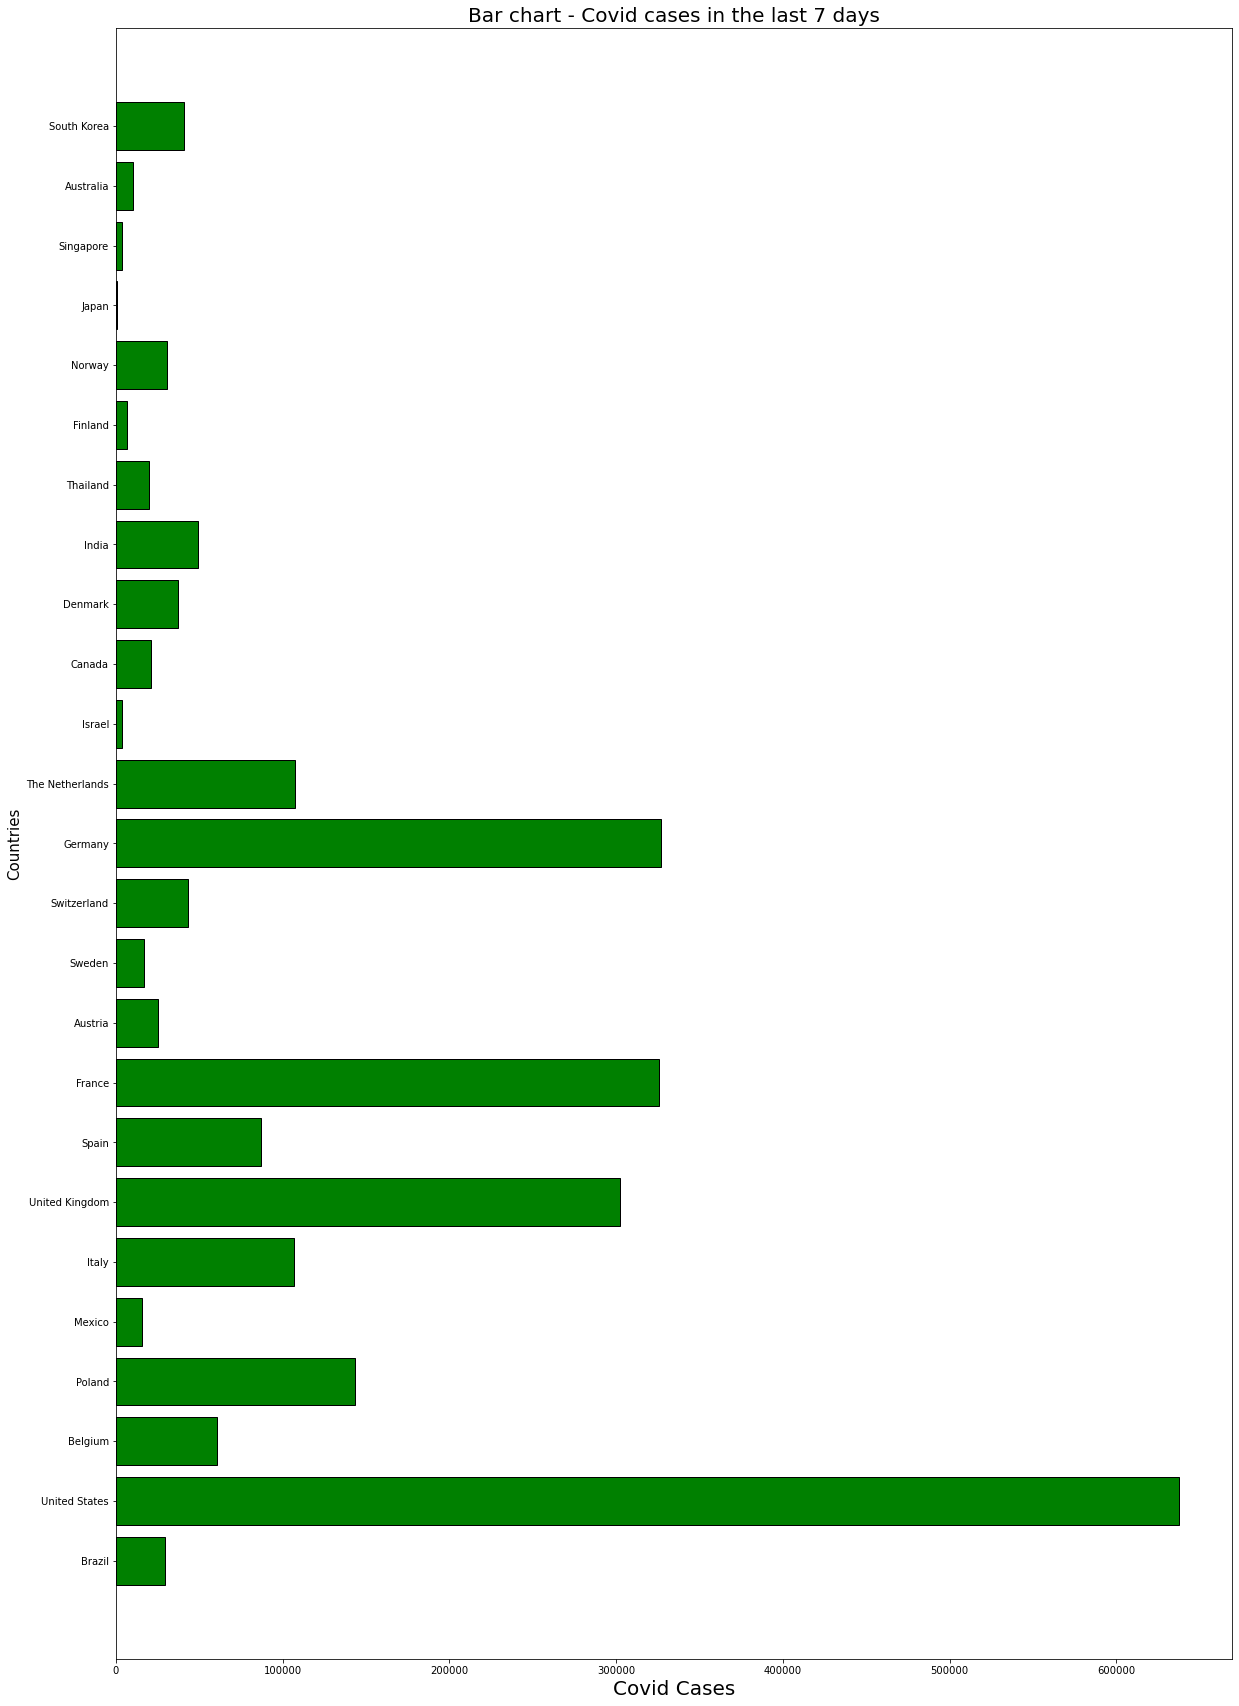

In [14]:
z = covid_df['Cases in last 7 days']

plt.barh (x , z, color = 'green', edgecolor = 'black')


plt.yticks (x, countries)

plt.rcParams["figure.figsize"] = (20,20)
plt.xlabel('Covid Cases', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.title("Bar chart - Covid cases in the last 7 days", fontsize = 20)


**rank is not a good predictor of covid cases**

**Japan has the 3rd most ranked hospitals and they have low covid cases, whereas Germany and the US (top 2) have high covid cases** 

**One thing that should be understood about the data lifecylce is that it may not always be linear. In our case, we needed to go back and  collect more data to look at because our initial data set is not adeqaute for drawing conclusions**

**Since population and covid-related data is already available to us,, we thought that we should include vaccination rates and the average income for the countries we have so far.**

In [15]:
vaccine_url = "https://github.com/govex/COVID-19/blob/master/data_tables/vaccine_data/global_data/vaccine_data_global.csv"
# pip install html5lib 


v = pd.read_html(vaccine_url)
vaccine_df = v[0]
vaccine_df

,Unnamed: 0,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,NaN,NaN,Afghanistan,2021-12-19,5.228706e+06,4.397449e+06,3.566192e+06,2021-12-19,4.0
1,NaN,NaN,Albania,2021-12-19,2.226267e+06,1.111494e+06,1.001189e+06,2021-12-19,8.0
2,NaN,NaN,Algeria,2021-12-19,1.229306e+07,6.875003e+06,5.391232e+06,2021-12-19,12.0
3,NaN,NaN,Andorra,2021-12-19,1.157090e+05,5.662800e+04,5.055100e+04,2021-12-19,20.0
4,NaN,NaN,Angola,2021-12-19,1.080528e+07,7.246240e+06,3.559041e+06,2021-12-19,24.0
...,...,...,...,...,...,...,...,...,...
627,NaN,NaN,West Bank and Gaza,2021-12-19,3.184868e+06,NaN,NaN,2021-12-19,275.0
628,NaN,NaN,World,2021-12-19,8.660043e+09,4.411008e+09,3.635381e+09,2021-12-19,NaN
629,NaN,NaN,Yemen,2021-12-19,7.860270e+05,5.566520e+05,3.665870e+05,2021-12-19,887.0
630,NaN,NaN,Zambia,2021-12-19,1.342989e+06,8.066110e+05,9.042010e+05,2021-12-19,894.0


In [16]:
# we need to clean this up to
# start by removing the countries we won't need like we did previously

# find the countries that we need to rename
set ( covid_df['Country'] ) - set ( vaccine_df['Country_Region'].unique() )

{'South Korea', 'The Netherlands', 'United States'}

**in vaccine_df, we need to rename the matching countries to match spelling in covid_df**

In [17]:
# first let's make sure the countries exist in the large vaccine_df
set ( vaccine_df['Country_Region'].unique() )

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary

**in the set of countries in vaccine_df, we can see that the coutries that need to be renamed are ['Korea, South', 'Netherlands', 'US]**

In [18]:
vaccine_df.replace ('Korea, South', 'South Korea', inplace = True)
vaccine_df.replace ('Netherlands', 'The Netherlands', inplace = True)
vaccine_df.replace ('US', 'United States', inplace = True)

# check again if there are any countries in covid_df that ARE NOT in vaccine df
set ( covid_df['Country'] ) - set ( vaccine_df['Country_Region'].unique() )

set()

**now, we drop the countries that we do not want**

In [19]:
rows_to_drop2 = []

for idx,row in vaccine_df.iterrows():
    if row['Country_Region'] not in covid_df['Country'].unique():
        rows_to_drop2.append(idx)
        
vaccine_df.drop(rows_to_drop2, inplace = True)
vaccine_df.head(10)

,Unnamed: 0,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
32,NaN,NaN,Australia,2021-12-19,41202316.0,20309711.0,19515162.0,2021-12-19,36.0
33,NaN,Australian Capital Territory,Australia,2021-12-19,1004996.0,NaN,NaN,2021-12-19,3601.0
34,NaN,New South Wales,Australia,2021-12-19,13323798.0,NaN,NaN,2021-12-19,3602.0
35,NaN,Northern Territory,Australia,2021-12-19,407691.0,NaN,NaN,2021-12-19,3603.0
36,NaN,Queensland,Australia,2021-12-19,7877589.0,NaN,NaN,2021-12-19,3604.0
37,NaN,South Australia,Australia,2021-12-19,2762641.0,NaN,NaN,2021-12-19,3605.0
38,NaN,Tasmania,Australia,2021-12-19,902251.0,NaN,NaN,2021-12-19,3606.0
39,NaN,Unknown,Australia,2021-12-19,0.0,NaN,NaN,2021-12-19,3609.0
40,NaN,Victoria,Australia,2021-12-19,11022565.0,NaN,NaN,2021-12-19,3607.0
41,NaN,Western Australia,Australia,2021-12-19,3900785.0,NaN,NaN,2021-12-19,3608.0


**next we'll drop the cities because with we want to keep count of how many people are partially and fully vaccinated, those values are NaN in the cities**

In [20]:
rows_to_drop3 = []
for idx,row in vaccine_df.iterrows():
    if np.isnan(row.People_partially_vaccinated) or np.isnan(row.People_fully_vaccinated):
        rows_to_drop3.append(idx)
        
vaccine_df.drop (rows_to_drop3, inplace = True)
vaccine_df

,Unnamed: 0,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
32,NaN,NaN,Australia,2021-12-19,4.120232e+07,20309711.0,19515162.0,2021-12-19,36.0
42,NaN,NaN,Austria,2021-12-19,1.574886e+07,6535083.0,6294779.0,2021-12-19,40.0
58,NaN,NaN,Belgium,2021-12-19,2.035133e+07,8879748.0,8759422.0,2021-12-19,56.0
65,NaN,NaN,Brazil,2021-12-19,3.245895e+08,165393977.0,141411665.0,2021-12-19,76.0
74,NaN,NaN,Canada,2021-12-19,6.483193e+07,31382974.0,29269344.0,2021-12-19,124.0
153,NaN,NaN,Denmark,2021-12-19,1.074284e+07,4702853.0,4505271.0,2021-12-19,208.0
183,NaN,NaN,Finland,2021-12-19,8.942499e+06,4322617.0,4084987.0,2021-12-19,246.0
184,NaN,NaN,France,2021-12-19,1.162086e+08,52430750.0,48496460.0,2021-12-19,250.0
208,NaN,NaN,Germany,2021-12-19,1.409153e+08,60888551.0,58411151.0,2021-12-19,276.0
237,NaN,NaN,India,2021-12-19,1.375067e+09,825531190.0,539835733.0,2021-12-19,356.0


**to finish cleaing up, we'll drop the columns with NaN, the UID, the duplicate date columns, and rename the columns for better context**

In [21]:
vaccine_df.drop (columns = ['Unnamed: 0', 'Province_State' ,'UID', 'Report_Date_String'], inplace = True)

vaccine_df = vaccine_df.reset_index(drop = True)
vaccine_df

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
0,Australia,2021-12-19,4.120232e+07,20309711.0,19515162.0
1,Austria,2021-12-19,1.574886e+07,6535083.0,6294779.0
2,Belgium,2021-12-19,2.035133e+07,8879748.0,8759422.0
3,Brazil,2021-12-19,3.245895e+08,165393977.0,141411665.0
4,Canada,2021-12-19,6.483193e+07,31382974.0,29269344.0
5,Denmark,2021-12-19,1.074284e+07,4702853.0,4505271.0
6,Finland,2021-12-19,8.942499e+06,4322617.0,4084987.0
7,France,2021-12-19,1.162086e+08,52430750.0,48496460.0
8,Germany,2021-12-19,1.409153e+08,60888551.0,58411151.0
9,India,2021-12-19,1.375067e+09,825531190.0,539835733.0


In [22]:
vaccine_df.rename (columns = {'Country_Region':'Country', 'Doses_admin':'Doses',
                             'People_partially_vaccinated': 'Partially_Vaccinated',
                             'People_fully_vaccinated': 'Fully_Vaccinated'}, inplace = True)
vaccine_df

,Country,Date,Doses,Partially_Vaccinated,Fully_Vaccinated
0,Australia,2021-12-19,4.120232e+07,20309711.0,19515162.0
1,Austria,2021-12-19,1.574886e+07,6535083.0,6294779.0
2,Belgium,2021-12-19,2.035133e+07,8879748.0,8759422.0
3,Brazil,2021-12-19,3.245895e+08,165393977.0,141411665.0
4,Canada,2021-12-19,6.483193e+07,31382974.0,29269344.0
5,Denmark,2021-12-19,1.074284e+07,4702853.0,4505271.0
6,Finland,2021-12-19,8.942499e+06,4322617.0,4084987.0
7,France,2021-12-19,1.162086e+08,52430750.0,48496460.0
8,Germany,2021-12-19,1.409153e+08,60888551.0,58411151.0
9,India,2021-12-19,1.375067e+09,825531190.0,539835733.0


In [26]:
final_df = covid_df.merge (vaccine_df, on = 'Country', how = 'left')

# drop the date because it is not needed for further analysis
# drop the weekly indicators in favor of aggregate features
# drop the ranked hospitals columns because it did not prove to be to be a useful metric
# drop total deaths because they account for more than covid cases

# we can't tell from our source if the stats for those fully vaccinated are included in the stats for those partially vaccinated
# however, in each country, the former is always lesser than the latter
# their sum is also always less than the population, and our guess is that the remainder represents those who are unvaccinated
# so we'll leave it in because our assumptions are fair (NOT AN ASPECT OF DATA SCIENCE BTW)


final_df.drop (columns = ['Cases in last 7 days', 'Deaths in last 7 days', 
                         'Daily increase (# deaths)', 'Ranked Hospitals', 
                          'Deaths per million (last 7 days)', 'Deaths per million (total)',
                         'Date'], inplace = True)

# show actual value instead of scaled value and rename column accordingly
final_df ['Population (in millions)'] = [i * 1000000 for i in final_df['Population (in millions)']]


final_df.rename (columns = {'Population (in millions)': 'population', 
                           'Confirmed cases (absolute)':'confirmed_cases', 
                            'Confirmed deaths (absolute)':'confirmed_deaths'}, inplace = True)

**to get a good sense of any relationship between the columns, we will create a correlation matrix via the DataFrame.corr() function**

**values will range from -1 to 1, correlation does not equal relationship but the visualization can be insightful**

In [27]:
corr = final_df.corr() 
corr

,confirmed_cases,confirmed_deaths,population,Doses,Partially_Vaccinated,Fully_Vaccinated
confirmed_cases,1.000000,0.935630,0.688369,0.769283,0.726363,0.775500
confirmed_deaths,0.935630,1.000000,0.580191,0.668814,0.624122,0.683884
population,0.688369,0.580191,1.000000,0.990369,0.997722,0.985534
Doses,0.769283,0.668814,0.990369,1.000000,0.997225,0.998917
Partially_Vaccinated,0.726363,0.624122,0.997722,0.997225,1.000000,0.994560
Fully_Vaccinated,0.775500,0.683884,0.985534,0.998917,0.994560,1.000000


**to better understand this table, we will use a heatmap via the seaborn library**

**https://seaborn.pydata.org/generated/seaborn.heatmap.html**

<AxesSubplot:>

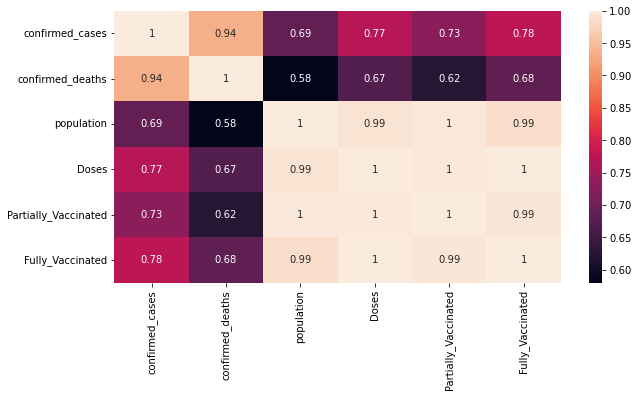

In [28]:
import seaborn as sns 

plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True)

**a feature of a heatmap is a score of diagonally down the center of the matrix, this is because every column compared to itself will yield a perfect correlation**

**the only meaningful correlation that jumps out is the obvious correlation between confirmed cases and vaccination status. a degree of correlation in the range [0.50, 1] is considered strong.**

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/

**To further analyze the relationship between confirmed cases and full vaccination status, we'll visualize those points using a scatter plot. Scatter plots are a common rool for identifying a correlation between two numeric variables. For example, the increase of average life expectancy accross time in an area (project 3). It is important that again that correlation does not imply causation, even if our scatter plot confirms the relationship between the two columns.**

https://asq.org/quality-resources/scatter-diagram

https://chartio.com/learn/charts/what-is-a-scatter-plot/

<AxesSubplot:xlabel='Fully_Vaccinated', ylabel='confirmed_cases'>

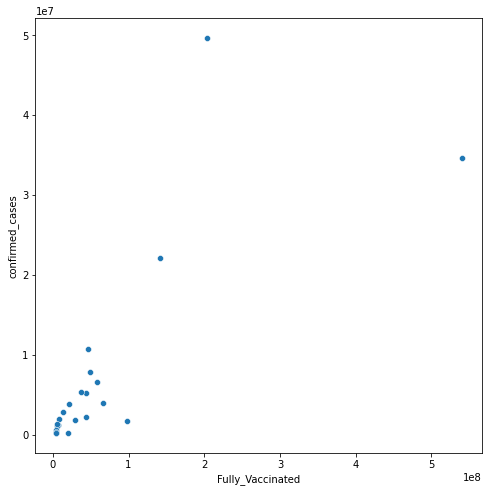

In [37]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(data = final_df, x = 'Fully_Vaccinated', y = 'confirmed_cases')

**a sample of 25 is too small to have statistical significant for a global problem**

1) walk through from data collection to visualization and remove unnecesary work
2) linear regression??
3) two machine learning algos?
4) conclusion and prose!